<a href="https://colab.research.google.com/github/PatriciaSojcakova/Zneus_project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Projekt 1***

---

In [9]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **1. Prieskumná analýza dát**

## **1.1 Analýza štruktúr dát**
Dataset pozostáva zo súboru `speeddating.csv`, ktorý obsahuje informácie o osobách a ich preferencie o potenciálnych partneroch. Súbor obsahuje 8378 záznamov, 123 atribútov typov int64 a object.

In [10]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_1/speeddating.csv')

/tmp/ipython-input-1521480062.py:1: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_1/speeddating.csv')


In [11]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype 
---   ------                           ----- 
 0    has_null                         int64 
 1    wave                             int64 
 2    gender                           object
 3    age                              object
 4    age_o                            object
 5    d_age                            int64 
 6    d_d_age                          object
 7    race                             object
 8    race_o                           object
 9    samerace                         int64 
 10   importance_same_race             object
 11   importance_same_religion         object
 12   d_importance_same_race           object
 13   d_importance_same_religion       object
 14   field                            object
 15   pref_o_attractive                object
 16   pref_o_sincere                   object
 17   pref_o_intel

In [12]:
data_new = data.copy()

for col in data_new.columns:
  if data_new[col].dtype == 'object' and not col.startswith('d_'):
    data_new[col] = pd.to_numeric(data_new[col], errors='coerce')

data_new.info(verbose=True)
corr_matrix_all = data_new.corr(method='pearson', numeric_only=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    has_null                         int64  
 1    wave                             int64  
 2    gender                           float64
 3    age                              float64
 4    age_o                            float64
 5    d_age                            int64  
 6    d_d_age                          object 
 7    race                             float64
 8    race_o                           float64
 9    samerace                         int64  
 10   importance_same_race             float64
 11   importance_same_religion         float64
 12   d_importance_same_race           object 
 13   d_importance_same_religion       object 
 14   field                            float64
 15   pref_o_attractive                float64
 16   pref_o_sincere                   float64

In [13]:
corr_decision = corr_matrix_all['decision'].sort_values(ascending=False)
corr_decision_o = corr_matrix_all['decision_o'].sort_values(ascending=False)

print("Korelácia s 'decision':")
display(corr_decision)

print("\nKorelácia s 'decision_o':")
display(corr_decision_o)

Korelácia s 'decision':


,decision
decision,1.000000
match,0.521943
like,0.513463
attractive_partner,0.486775
funny_partner,0.414477
...,...
importance_same_race,-0.092271
gender,NaN
race,NaN
race_o,NaN



Korelácia s 'decision_o':


,decision_o
decision_o,1.000000
match,0.522326
attractive_o,0.486885
funny_o,0.414276
shared_interests_o,0.400501
...,...
shared_interests_important,-0.079075
gender,NaN
race,NaN
race_o,NaN


Vybratie atribútov

In [14]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype 
---   ------                           ----- 
 0    has_null                         int64 
 1    wave                             int64 
 2    gender                           object
 3    age                              object
 4    age_o                            object
 5    d_age                            int64 
 6    d_d_age                          object
 7    race                             object
 8    race_o                           object
 9    samerace                         int64 
 10   importance_same_race             object
 11   importance_same_religion         object
 12   d_importance_same_race           object
 13   d_importance_same_religion       object
 14   field                            object
 15   pref_o_attractive                object
 16   pref_o_sincere                   object
 17   pref_o_intel

In [15]:
cols = ['gender', 'age', 'age_o', 'd_age', 'race','race_o','samerace', 'importance_same_race', 'importance_same_religion',
        'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
        'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner',
        'interests_correlate','like', 'met','decision','decision_o', 'match']
data = data[cols].copy()

data.head()

,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,attractive_o,...,sincere_partner,intelligence_partner,funny_partner,ambition_partner,interests_correlate,like,met,decision,decision_o,match
0,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,6,...,9,7,7,6,0.14,7,0,1,0,0
1,female,21,22,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,7,...,8,7,8,5,0.54,7,1,1,0,0
2,female,21,22,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,10,...,8,9,8,5,0.16,7,1,1,1,1
3,female,21,23,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,7,...,6,8,7,6,0.61,7,0,1,1,1
4,female,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,8,...,6,7,7,6,0.21,6,0,1,1,1


In [16]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    8378 non-null   object
 1   age                       8378 non-null   object
 2   age_o                     8378 non-null   object
 3   d_age                     8378 non-null   int64 
 4   race                      8378 non-null   object
 5   race_o                    8378 non-null   object
 6   samerace                  8378 non-null   int64 
 7   importance_same_race      8378 non-null   object
 8   importance_same_religion  8378 non-null   object
 9   attractive_o              8378 non-null   object
 10  sinsere_o                 8378 non-null   object
 11  intelligence_o            8378 non-null   object
 12  funny_o                   8378 non-null   object
 13  ambitous_o                8378 non-null   object
 14  attractive_partner      

## **1.2 Čistenie dát**


### **1.2.A Identifikácia a odstránenie duplikátov**

In [17]:
print("Duplicity v dátach:", data.duplicated().sum())

Duplicity v dátach: 0


Dataset neobsahuje žiadne duplikáty.

### **1.2.B Identifikácia chýbajúcich hodnôt a ich nahradenie**
Zistili sme, že namiesto hodnoty NaN alebo null sa v datasete objavuje "?". Pre lepši manipuláciu s dátami sme túto hodnotu nahradili hodnotov NaN.

In [18]:
print('------------ Počet výskytov "?" v stĺpcoch ------------')
for col in data.columns:
    print(f"{col}: {(data[col] == '?').sum()}")

------------ Počet výskytov "?" v stĺpcoch ------------
gender: 0
age: 95
age_o: 104
d_age: 0
race: 63
race_o: 73
samerace: 0
importance_same_race: 79
importance_same_religion: 79
attractive_o: 212
sinsere_o: 287
intelligence_o: 306
funny_o: 360
ambitous_o: 722
attractive_partner: 202
sincere_partner: 277
intelligence_partner: 296
funny_partner: 350
ambition_partner: 712
interests_correlate: 158
like: 240
met: 375
decision: 0
decision_o: 0
match: 0


In [19]:
data.replace('?', np.nan, inplace=True)
print(data.isnull().sum())

gender                        0
age                          95
age_o                       104
d_age                         0
race                         63
race_o                       73
samerace                      0
importance_same_race         79
importance_same_religion     79
attractive_o                212
sinsere_o                   287
intelligence_o              306
funny_o                     360
ambitous_o                  722
attractive_partner          202
sincere_partner             277
intelligence_partner        296
funny_partner               350
ambition_partner            712
interests_correlate         158
like                        240
met                         375
decision                      0
decision_o                    0
match                         0
dtype: int64


In [20]:
data = data.dropna()
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6596 entries, 0 to 8377
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    6596 non-null   object
 1   age                       6596 non-null   object
 2   age_o                     6596 non-null   object
 3   d_age                     6596 non-null   int64 
 4   race                      6596 non-null   object
 5   race_o                    6596 non-null   object
 6   samerace                  6596 non-null   int64 
 7   importance_same_race      6596 non-null   object
 8   importance_same_religion  6596 non-null   object
 9   attractive_o              6596 non-null   object
 10  sinsere_o                 6596 non-null   object
 11  intelligence_o            6596 non-null   object
 12  funny_o                   6596 non-null   object
 13  ambitous_o                6596 non-null   object
 14  attractive_partner        659

### **1.2.C Oprava dátových typov dát**
Atribúty, kde sa nachádzajú iba čísla a hodnoty Nan, pretypujeme na numerický dátový typ.

In [21]:
for col in data.columns:
  if (col not in ["gender", "race", "race_o"]) :
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6596 entries, 0 to 8377
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    6596 non-null   object 
 1   age                       6596 non-null   int64  
 2   age_o                     6596 non-null   int64  
 3   d_age                     6596 non-null   int64  
 4   race                      6596 non-null   object 
 5   race_o                    6596 non-null   object 
 6   samerace                  6596 non-null   int64  
 7   importance_same_race      6596 non-null   int64  
 8   importance_same_religion  6596 non-null   int64  
 9   attractive_o              6596 non-null   float64
 10  sinsere_o                 6596 non-null   float64
 11  intelligence_o            6596 non-null   float64
 12  funny_o                   6596 non-null   float64
 13  ambitous_o                6596 non-null   float64
 14  attractive_pa

In [22]:
data.head()

,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,attractive_o,...,sincere_partner,intelligence_partner,funny_partner,ambition_partner,interests_correlate,like,met,decision,decision_o,match
0,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,6.0,...,9.0,7.0,7.0,6.0,0.14,7.0,0,1,0,0
1,female,21,22,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,7.0,...,8.0,7.0,8.0,5.0,0.54,7.0,1,1,0,0
2,female,21,22,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,10.0,...,8.0,9.0,8.0,5.0,0.16,7.0,1,1,1,1
3,female,21,23,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,7.0,...,6.0,8.0,7.0,6.0,0.61,7.0,0,1,1,1
4,female,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,8.0,...,6.0,7.0,7.0,6.0,0.21,6.0,0,1,1,1


### **1.2.D Identifikácia odľahlých hodnôt**

In [23]:
outliers_cols = ['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
                  'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner',
                  'interests_correlate','like',]

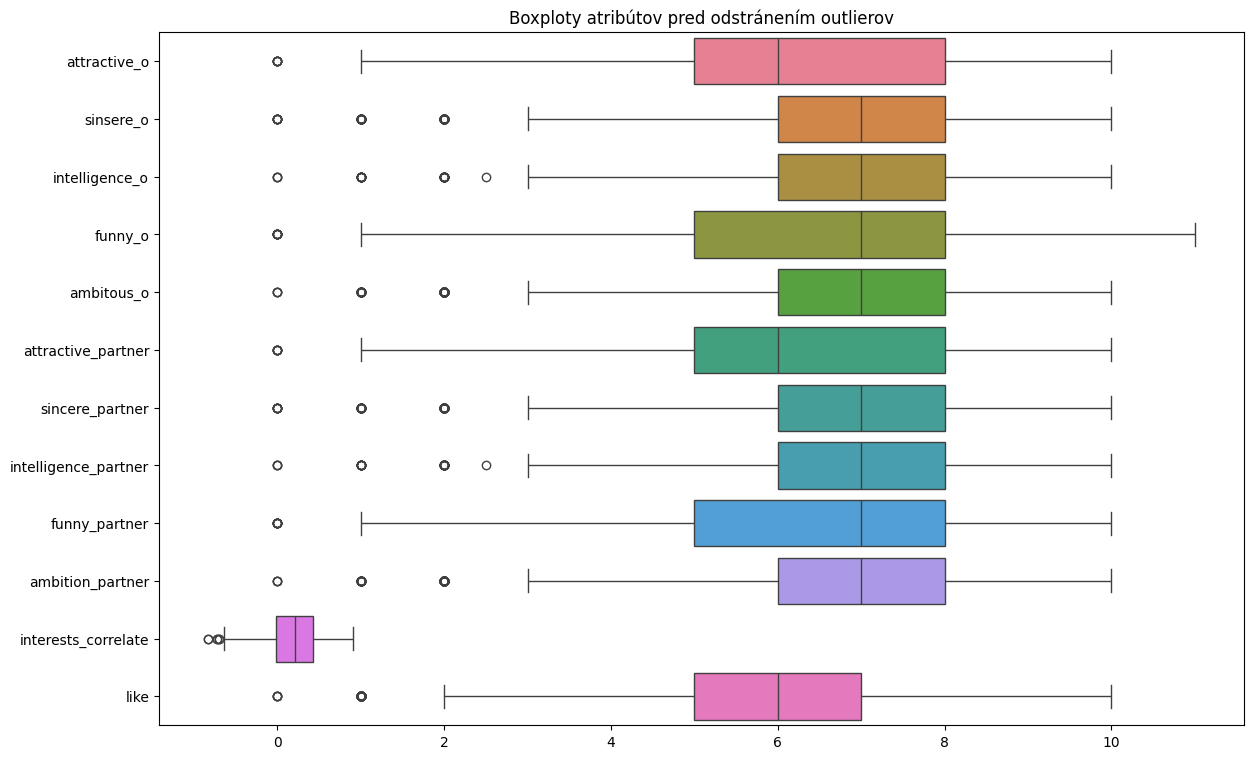

In [24]:
plt.figure(figsize=(14, len(outliers_cols) * 0.75))
sns.boxplot(data=data[outliers_cols], orient='h')
plt.title("Boxploty atribútov pred odstránením outlierov")
plt.show()

In [25]:
outlier_indices = set()

for col in outliers_cols:
    q25, q75 = percentile(data[col].dropna(), 25), percentile(data[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = 1.5 * iqr
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = data[(data[col] < lower) | (data[col] > upper)].index
    outlier_indices.update(outliers)

    print(f"\nAtribút: {col}")
    print(f"Q1 (25. percentil): {q25:.2f}")
    print(f"Q3 (75. percentil): {q75:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Dolná hranica: {lower:.2f}")
    print(f"Horná hranica: {upper:.2f}")
    print(f"Počet odľahlých hodnôt: {len(outliers)}")

data = data.drop(index=outlier_indices)


Atribút: attractive_o
Q1 (25. percentil): 5.00
Q3 (75. percentil): 8.00
IQR: 3.00
Dolná hranica: 0.50
Horná hranica: 12.50
Počet odľahlých hodnôt: 6

Atribút: sinsere_o
Q1 (25. percentil): 6.00
Q3 (75. percentil): 8.00
IQR: 2.00
Dolná hranica: 3.00
Horná hranica: 11.00
Počet odľahlých hodnôt: 100

Atribút: intelligence_o
Q1 (25. percentil): 6.00
Q3 (75. percentil): 8.00
IQR: 2.00
Dolná hranica: 3.00
Horná hranica: 11.00
Počet odľahlých hodnôt: 42

Atribút: funny_o
Q1 (25. percentil): 5.00
Q3 (75. percentil): 8.00
IQR: 3.00
Dolná hranica: 0.50
Horná hranica: 12.50
Počet odľahlých hodnôt: 9

Atribút: ambitous_o
Q1 (25. percentil): 6.00
Q3 (75. percentil): 8.00
IQR: 2.00
Dolná hranica: 3.00
Horná hranica: 11.00
Počet odľahlých hodnôt: 128

Atribút: attractive_partner
Q1 (25. percentil): 5.00
Q3 (75. percentil): 8.00
IQR: 3.00
Dolná hranica: 0.50
Horná hranica: 12.50
Počet odľahlých hodnôt: 6

Atribút: sincere_partner
Q1 (25. percentil): 6.00
Q3 (75. percentil): 8.00
IQR: 2.00
Dolná hrani

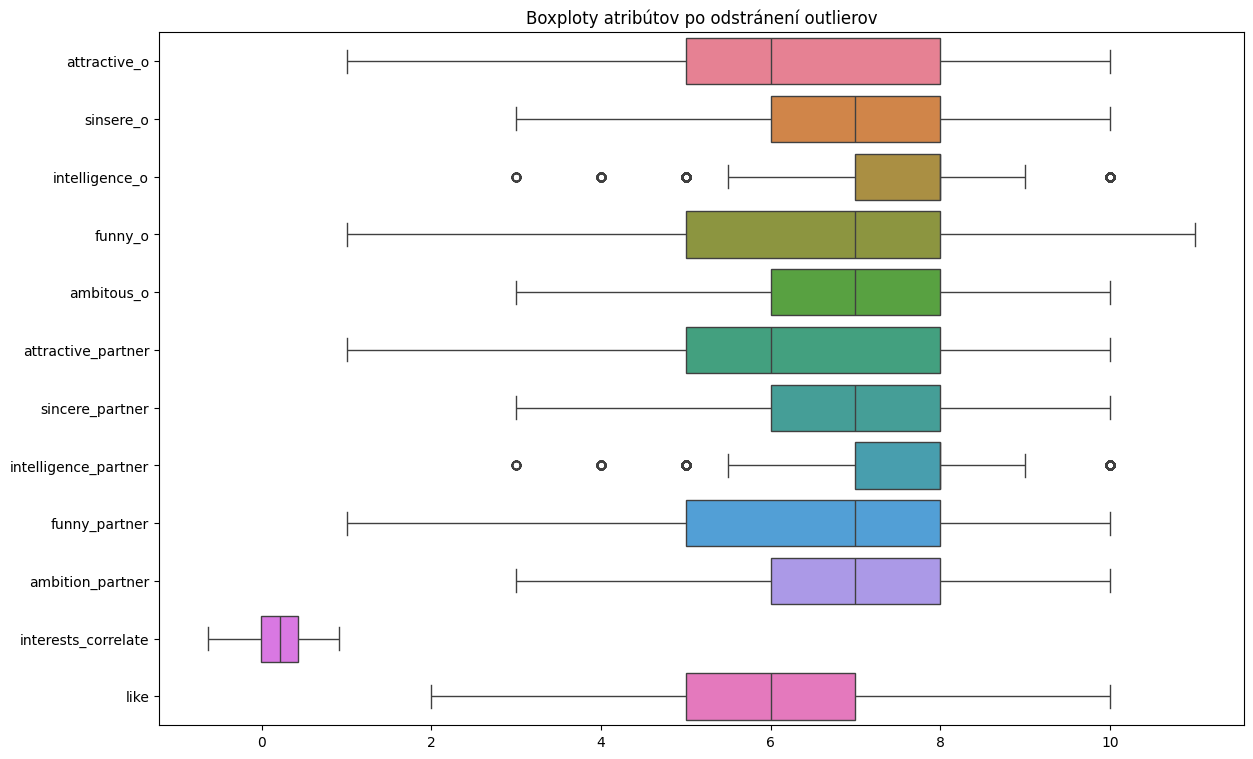

In [26]:
plt.figure(figsize=(14, len(outliers_cols) * 0.75))
sns.boxplot(data=data[outliers_cols], orient='h')
plt.title("Boxploty atribútov po odstránení outlierov")
plt.show()

In [27]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6142 entries, 0 to 8377
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    6142 non-null   object 
 1   age                       6142 non-null   int64  
 2   age_o                     6142 non-null   int64  
 3   d_age                     6142 non-null   int64  
 4   race                      6142 non-null   object 
 5   race_o                    6142 non-null   object 
 6   samerace                  6142 non-null   int64  
 7   importance_same_race      6142 non-null   int64  
 8   importance_same_religion  6142 non-null   int64  
 9   attractive_o              6142 non-null   float64
 10  sinsere_o                 6142 non-null   float64
 11  intelligence_o            6142 non-null   float64
 12  funny_o                   6142 non-null   float64
 13  ambitous_o                6142 non-null   float64
 14  attractive_pa

## **1.3 Analýza vybraných atribútov**

Opis atribútov:

Vykonanie základných deskriptívnych štatistík nad numerickými atribútmi




In [28]:
numeric_columns = data.select_dtypes(include=['int64','float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in numeric_columns:
  display(data[col].describe())
  print("-" * 30)

,age
count,6142.000000
mean,26.282970
std,3.480941
min,18.000000
25%,24.000000
50%,26.000000
75%,28.000000
max,55.000000


------------------------------


,age_o
count,6142.000000
mean,26.277271
std,3.475853
min,18.000000
25%,24.000000
50%,26.000000
75%,28.000000
max,55.000000


------------------------------


,d_age
count,6142.000000
mean,3.596711
std,2.972217
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,32.000000


------------------------------


,samerace
count,6142.000000
mean,0.398404
std,0.489609
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


------------------------------


,importance_same_race
count,6142.000000
mean,3.799739
std,2.821501
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,10.000000


------------------------------


,importance_same_religion
count,6142.000000
mean,3.657766
std,2.815404
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,10.000000


------------------------------


,attractive_o
count,6142.000000
mean,6.277336
std,1.878648
min,1.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,10.000000


------------------------------


,sinsere_o
count,6142.000000
mean,7.304217
std,1.579326
min,3.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,intelligence_o
count,6142.000000
mean,7.468251
std,1.441149
min,3.000000
25%,7.000000
50%,8.000000
75%,8.000000
max,10.000000


------------------------------


,funny_o
count,6142.000000
mean,6.525887
std,1.837782
min,1.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,11.000000


------------------------------


,ambitous_o
count,6142.000000
mean,6.914116
std,1.650719
min,3.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,attractive_partner
count,6142.000000
mean,6.298339
std,1.859688
min,1.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,10.000000


------------------------------


,sincere_partner
count,6142.000000
mean,7.318707
std,1.567921
min,3.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,intelligence_partner
count,6142.000000
mean,7.477613
std,1.429199
min,3.000000
25%,7.000000
50%,8.000000
75%,8.000000
max,10.000000


------------------------------


,funny_partner
count,6142.000000
mean,6.552263
std,1.807285
min,1.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,ambition_partner
count,6142.000000
mean,6.915744
std,1.649125
min,3.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


------------------------------


,interests_correlate
count,6142.000000
mean,0.198354
std,0.301430
min,-0.630000
25%,-0.010000
50%,0.210000
75%,0.430000
max,0.910000


------------------------------


,like
count,6142.000000
mean,6.280397
std,1.693068
min,2.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


------------------------------


,met
count,6142.000000
mean,0.053240
std,0.272375
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


------------------------------


,decision
count,6142.000000
mean,0.445458
std,0.497057
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


------------------------------


,decision_o
count,6142.000000
mean,0.439922
std,0.496418
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


------------------------------


,match
count,6142.000000
mean,0.180723
std,0.384820
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


------------------------------


Grafické zobrazenie vybraných atribútov:

---



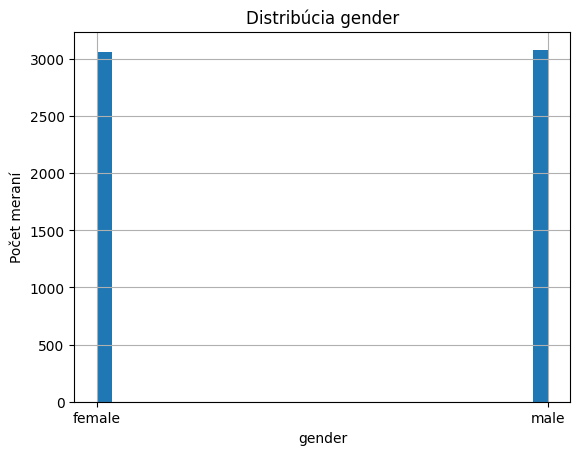

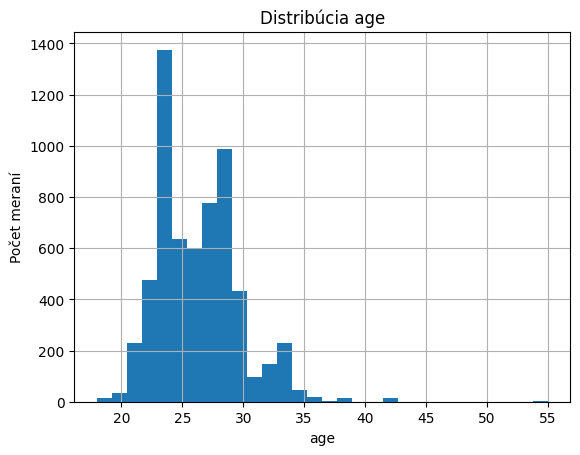

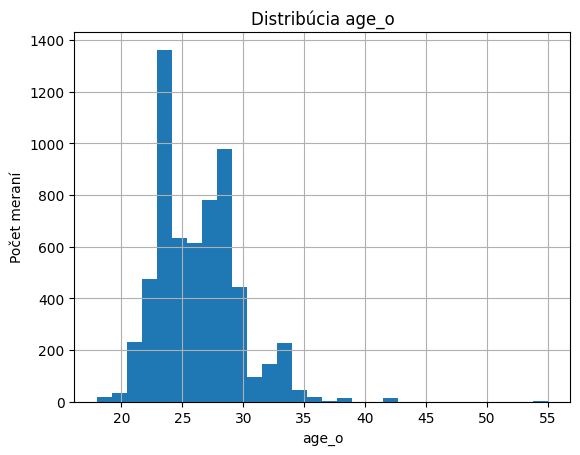

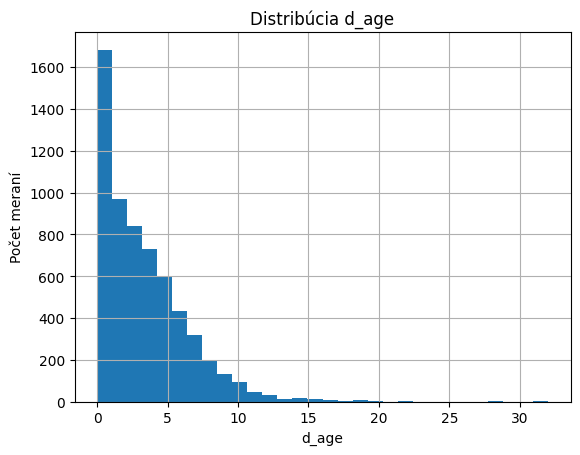

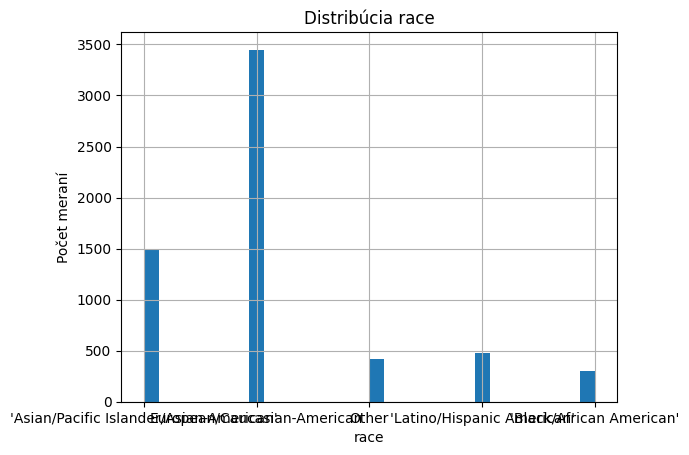

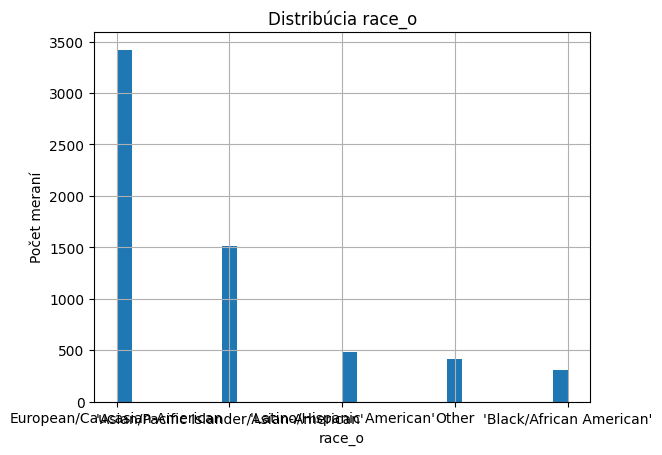

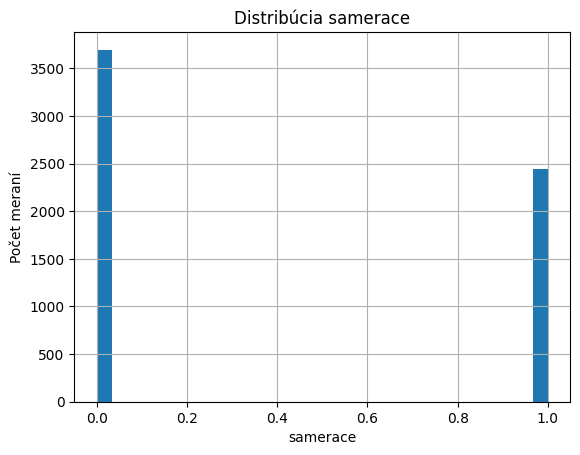

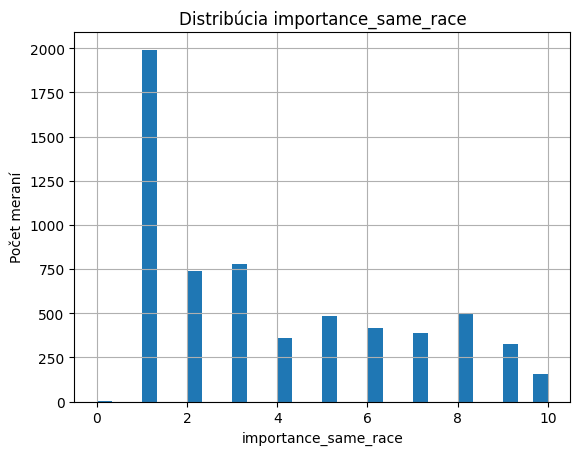

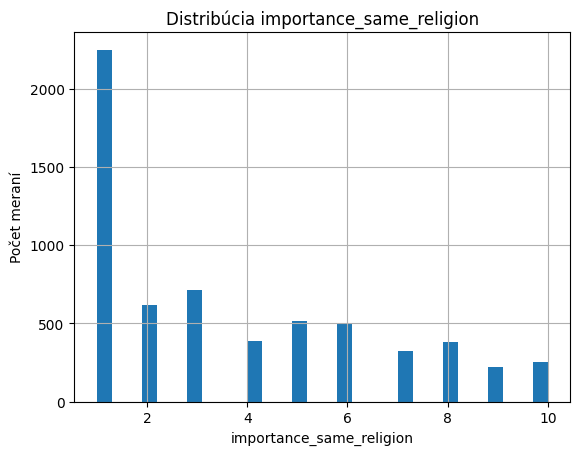

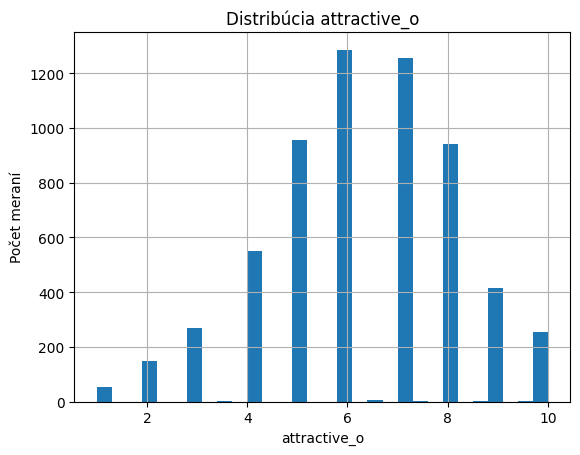

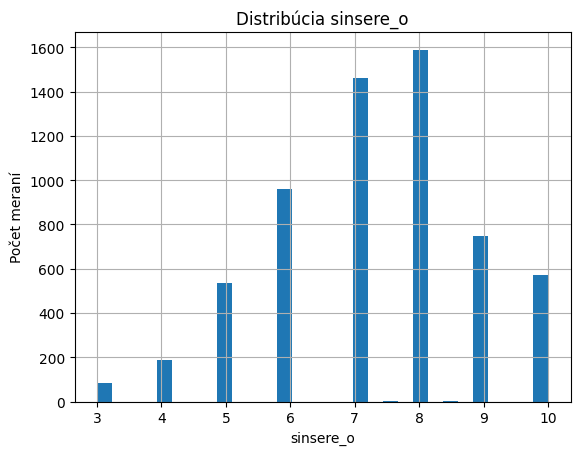

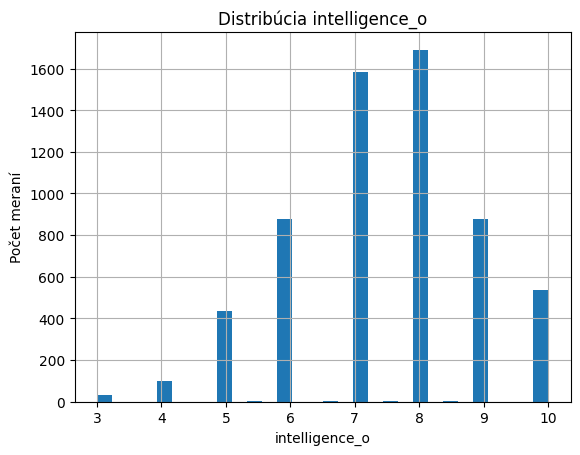

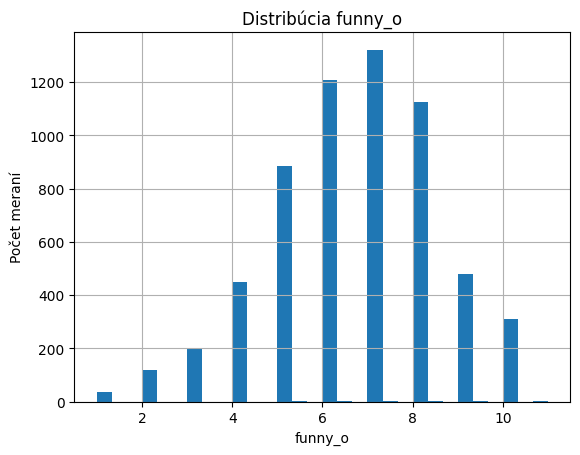

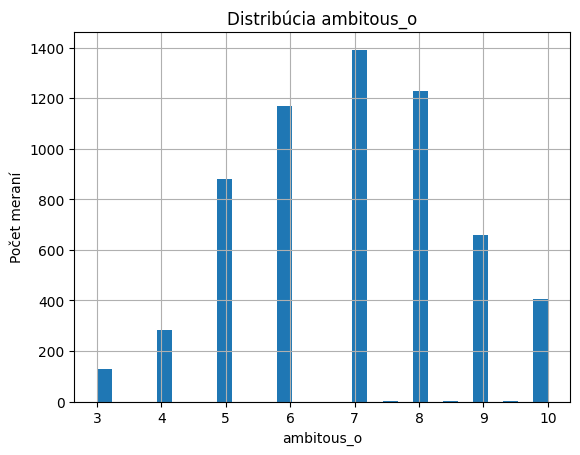

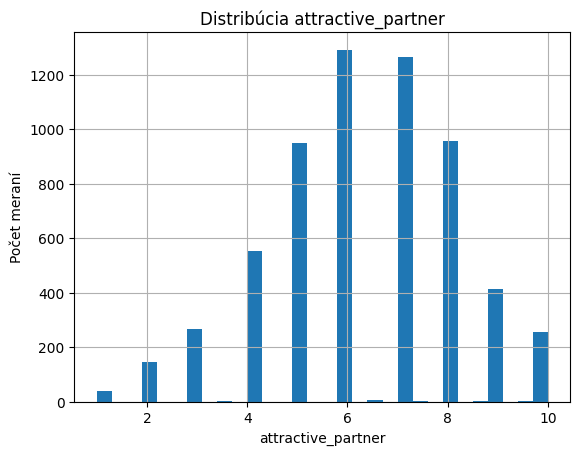

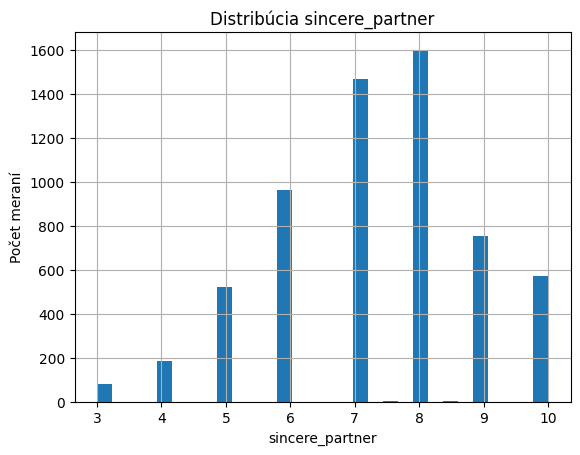

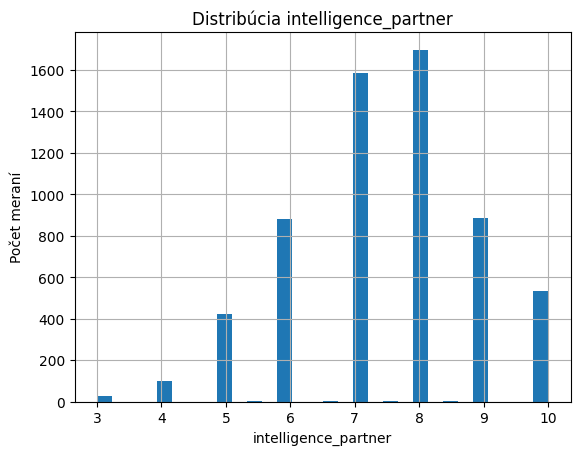

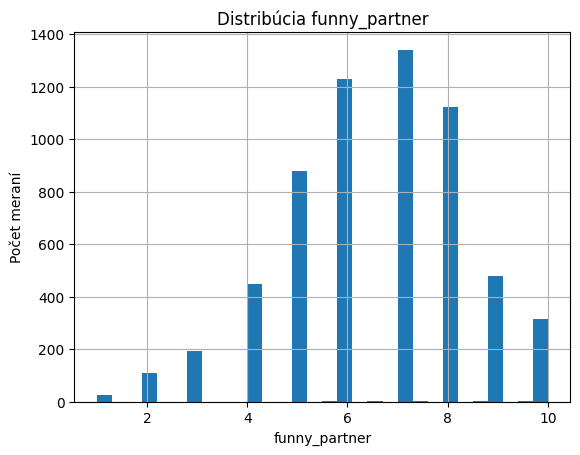

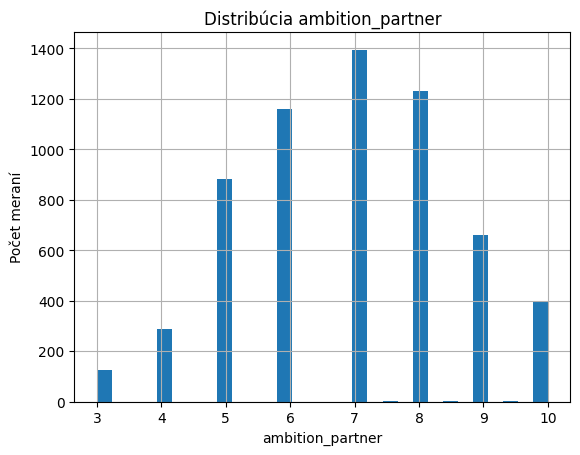

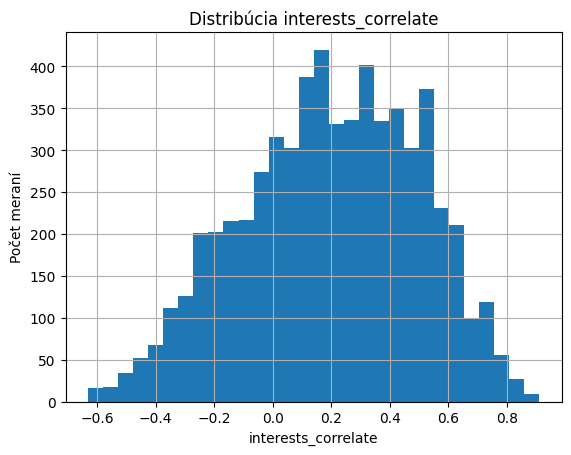

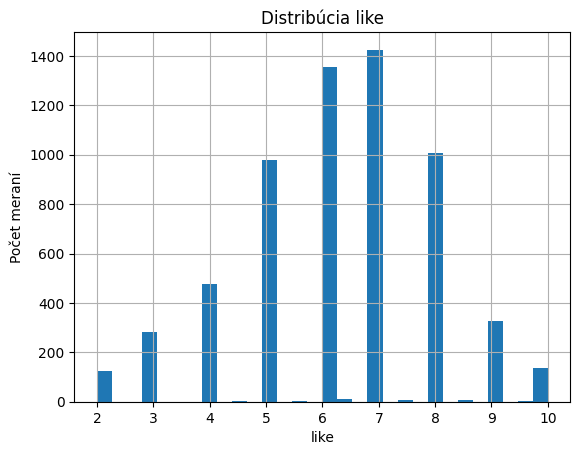

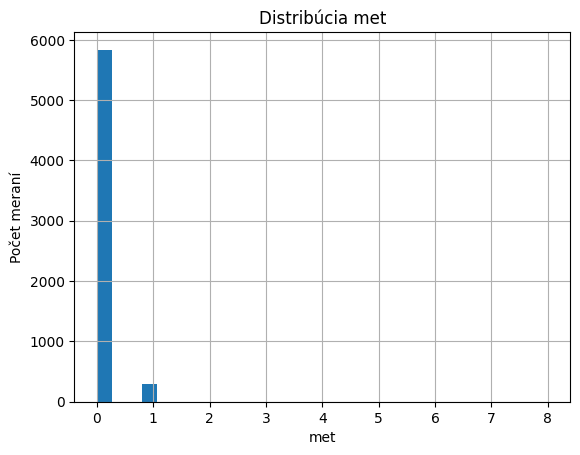

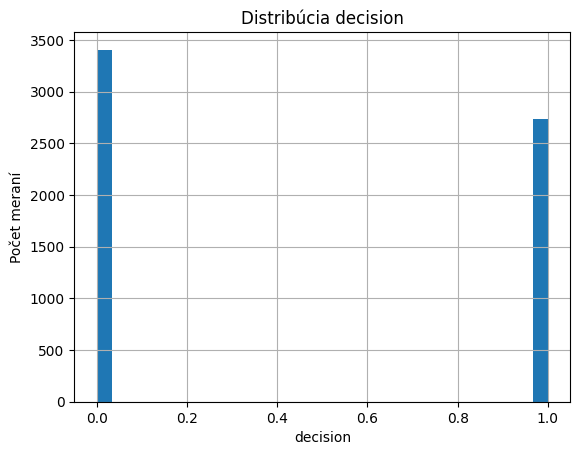

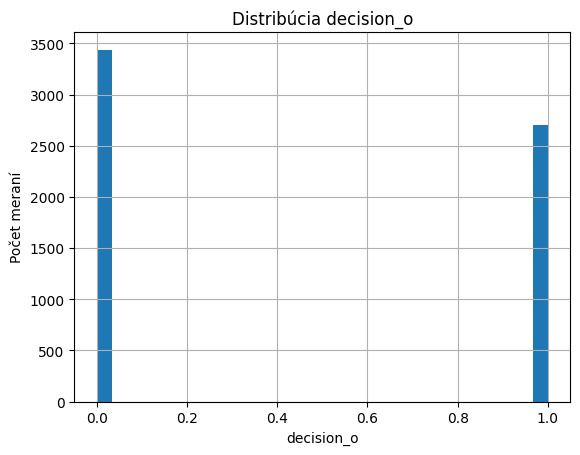

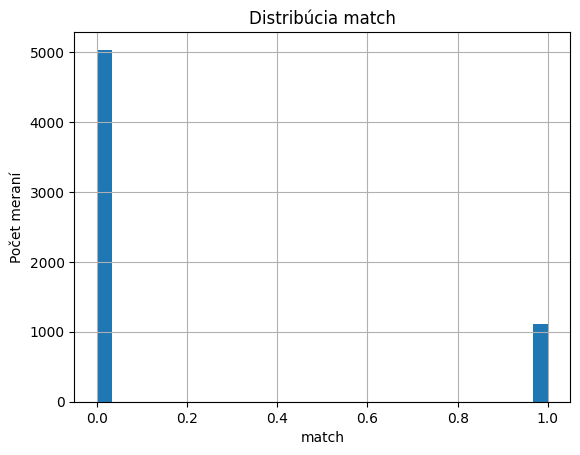

In [29]:
for col in cols:
    plt.figure()
    data[col].hist(bins=30)
    plt.title(f"Distribúcia {col}")
    plt.xlabel(col)
    plt.ylabel("Počet meraní")
    plt.show()

Zobrazenie korelácii pomocou korelačnej matice na základe Pearsonovho korelačného koeficientu.

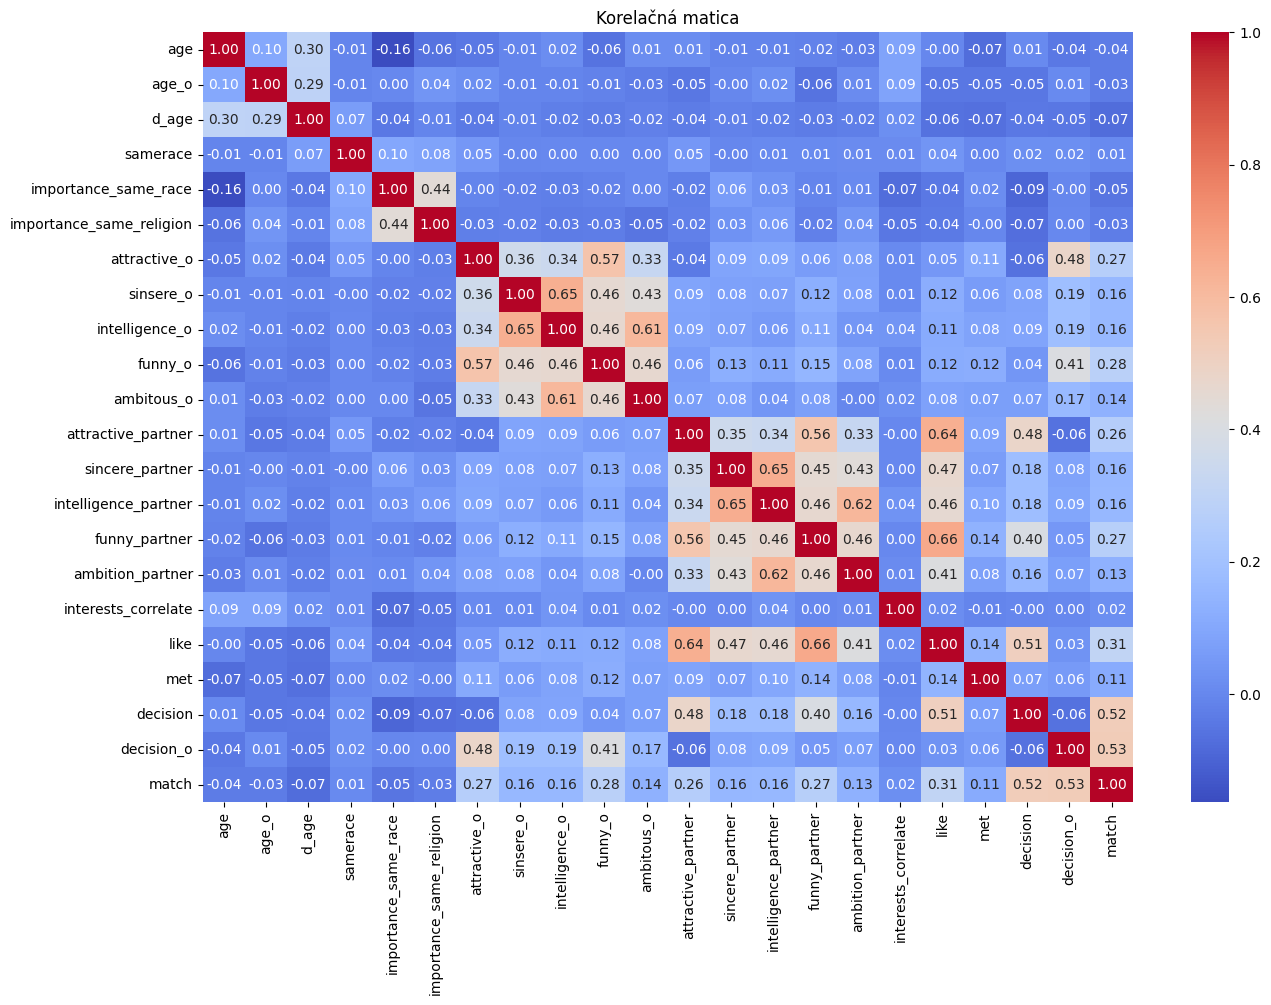

In [30]:
corr_matrix = data[numeric_columns].corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelačná matica")
plt.show()

## **1.4 Hypotézy**

## **1.5 Evaluation metrics**

Accuracy -> Podiel správnych predpovedí

F1-score

Confusion matrix -> Vizualizácia správnych a nesprávnych predpovedí
